#### Algorithmic Trading COMP0051 2023/24 Coursework 1

## Time series [10 Points]

#### 1.  Download two ETF time series using an API. The length of the time series T, with T=300 and a daily resolution.

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Define the tickers and the time period
# SPY: ETF that tracks the S&P 500, QQQ: ETF that tracks the NASDAQ-100
tickers = ['SPY', 'QQQ'] 

# Download historical data
data = yf.download(tickers, period="300d")['Close']

print(len(data))


[*********************100%%**********************]  2 of 2 completed
300


#### 2.  Plot the price time series

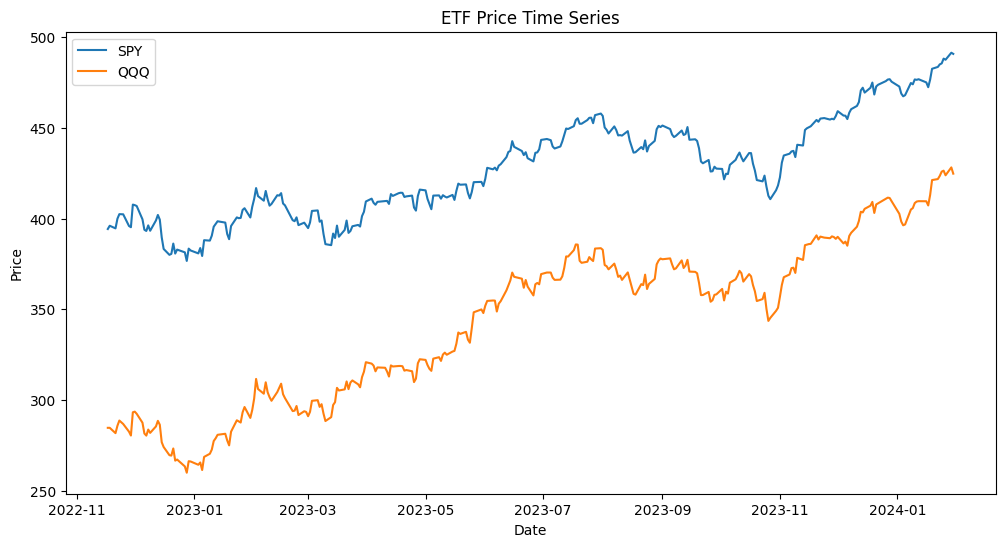

In [13]:

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['SPY'], label='SPY')
plt.plot(data.index, data['QQQ'], label='QQQ')
plt.title('ETF Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Moving averages [20 Points]

#### 3.  Define mathematically the moving average of the price time series with an arbitrary time-window τ

The moving average of a price time series with a time-window τ is mathematically defined as follows:

- Let `P(t)` represent the price at time `t`.
- The moving average `MA(t)` at time `t` for a time-window `τ` is given by the formula:

$$
MA(t) = \frac{1}{\tau} \sum_{n=0}^{\tau-1} P(t-n)
$$


#### 4.  Compute three moving averages of the price time series, with time-windows τ=5,20,60

In [14]:
# Calculate moving averages for specified time windows
tau_values = [5, 20, 60]
for tau in tau_values:
    for ticker in tickers:
        data[f'{ticker}_MA{tau}'] = data[ticker].rolling(window=tau).mean()

# Display the last few rows of the dataframe with the moving averages
print(data.tail())

                   QQQ         SPY     SPY_MA5     QQQ_MA5    SPY_MA20  \
Date                                                                     
2024-01-24  425.829987  485.390015  482.523999  421.041998  475.935501   
2024-01-25  426.350006  488.029999  484.832001  423.714001  476.554501   
2024-01-26  423.809998  487.410004  485.828003  424.240002  477.099501   
2024-01-29  428.149994  491.269989  487.391998  425.523999  477.828500   
2024-01-30  424.709991  490.630005  488.546002  425.769995  478.594501   

              QQQ_MA20    SPY_MA60    QQQ_MA60  
Date                                            
2024-01-24  409.859998  459.307168  393.404332  
2024-01-25  410.633498  460.596334  394.754999  
2024-01-26  411.248997  461.793334  395.998499  
2024-01-29  412.091498  463.011167  397.286499  
2024-01-30  412.850998  464.144001  398.415666  


#### 5.  Plot the moving averages against the price time series

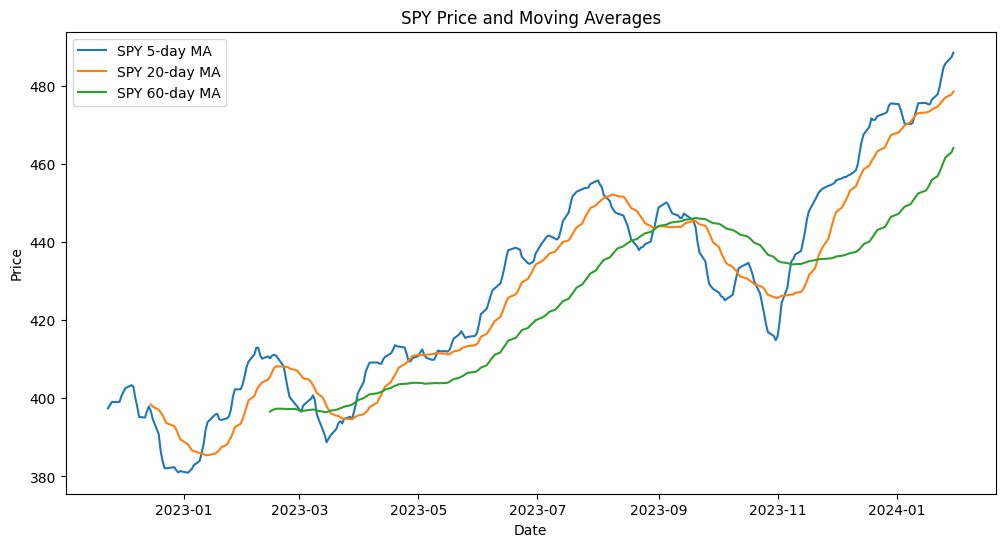

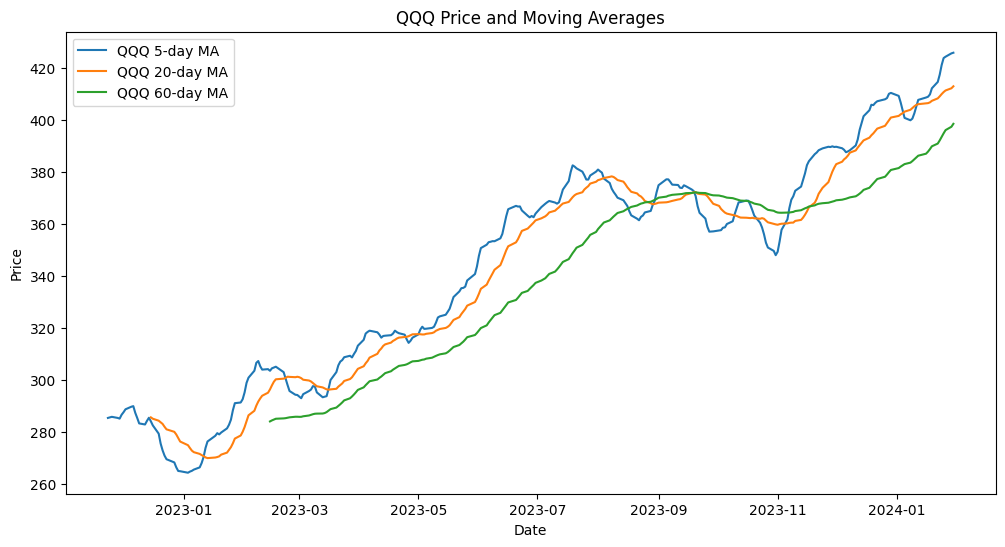

In [16]:
# Plot the moving averages against the price time series for each ticker
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    # plt.plot(data.index, data[ticker], label=f'{ticker} Price', color='blue')
    for tau in tau_values:
        plt.plot(data.index, data[f'{ticker}_MA{tau}'], label=f'{ticker} {tau}-day MA')

    plt.title(f'{ticker} Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

#### 6.  Compute the linear and log-return of the price time series

In [19]:
import numpy as np

# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Compute the linear returns
linear_returns = data.pct_change()

# Compute the log-returns
log_returns = np.log(data / data.shift(1))

# Display the last few rows of linear and log-returns
print("Linear Returns:\n", linear_returns.tail())
print("\nLog Returns:\n", log_returns.tail())

[*********************100%%**********************]  2 of 2 completed
Linear Returns:
                  QQQ       SPY
Date                          
2024-01-24  0.005549  0.001093
2024-01-25  0.001221  0.005439
2024-01-26 -0.005958 -0.001270
2024-01-29  0.010240  0.007919
2024-01-30 -0.006657 -0.000773

Log Returns:
                  QQQ       SPY
Date                          
2024-01-24  0.005534  0.001093
2024-01-25  0.001220  0.005424
2024-01-26 -0.005975 -0.001271
2024-01-29  0.010188  0.007888
2024-01-30 -0.006679 -0.000774


#### 7.  Plot the linear return against the log-return time series

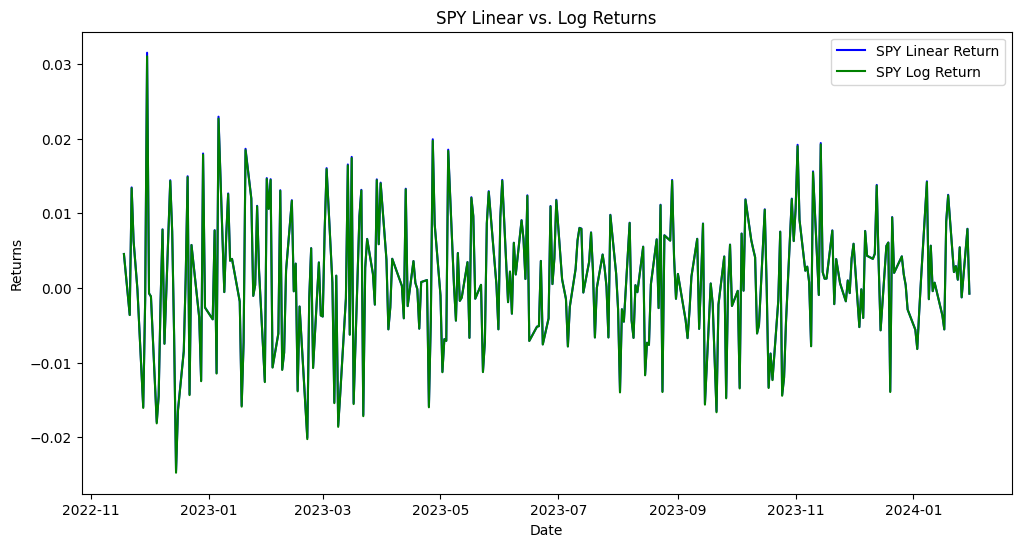

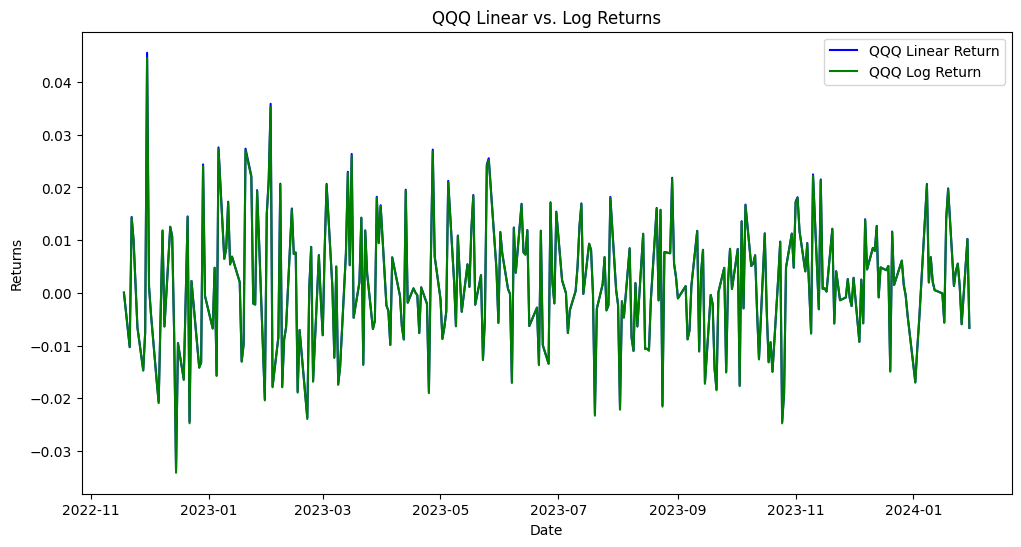

In [23]:
# Plot the linear return against the log-return time series for each ticker
for ticker in tickers:
    plt.figure(figsize=(12, 6))

    # Plot both linear and log returns on the same graph
    plt.plot(linear_returns.index, linear_returns[ticker], label=f'{ticker} Linear Return', color='blue')
    plt.plot(log_returns.index, log_returns[ticker], label=f'{ticker} Log Return', color='green')

    plt.title(f'{ticker} Linear vs. Log Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()

    plt.show()

## Time Series Analysis [20 Points]

#### 8.  Define the auto-correlation function (for a stationary time-series)


The auto-correlation function for a stationary time series is a key concept in time series analysis, used for identifying patterns and potential predictability. It measures how much the time series correlates with a delayed version of itself. For a stationary time series $X_t$, the auto-correlation function (ACF) at lag $k$ is defined as follows:

- Let $ \mu $ be the mean of the time series $X_t$ and $ \sigma^2 $ be its variance.
- The auto-correlation function $ \rho(k) $ at lag $k$ is given by the formula:

  $$ \rho(k) = \frac{E[(X_t - \mu)(X_{t-k} - \mu)]}{\sigma^2} $$

  where:
  - $ E $ is the expectation operator.
  - $ X_t $ is the value of the time series at time $ t $.
  - $ X_{t-k} $ is the value of the time series at time $ t-k $.
  - $ \mu $ is the mean of the time series.
  - $ \sigma^2 $ is the variance of the time series.
  - $ k $ is the lag, a non-negative integer.

In simpler terms, $ \rho(k) $ measures the degree of linear relationship between the values of the time series separated by a lag of $ k $ periods. The ACF value lies between -1 and 1, where 1 indicates perfect positive correlation, -1 indicates perfect negative correlation, and 0 indicates no correlation.


#### 9.  Compute the auto-correlation functions (ACF) of the price time series

#### 10.  Plot the price ACFs

[*********************100%%**********************]  2 of 2 completed


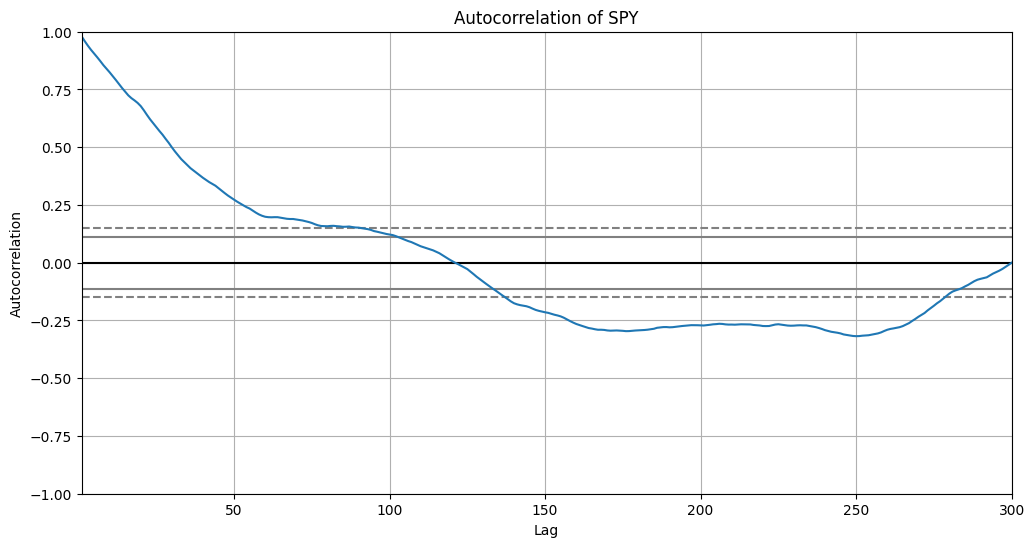

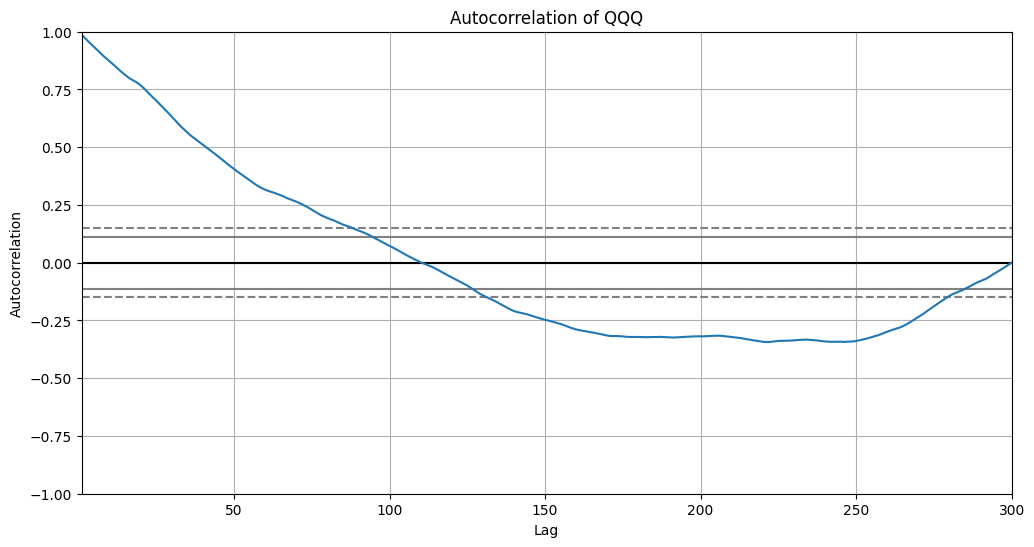

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Define the tickers and the period
tickers = ['SPY', 'QQQ']
period = "300d"

# Download historical data for the specified ETFs
data = yf.download(tickers, period=period)['Close']

# Plot ACF for each ticker
for ticker in tickers:
    # Drop NaN values from time series
    ts = data[ticker].dropna()
    
    # Plot ACF using pandas
    plt.figure(figsize=(12, 6))
    autocorrelation_plot(ts)
    plt.title(f'Autocorrelation of {ticker}')
    plt.show()

#### 11.  Compute the partial auto-correlation functions (PACF) of the price time series

#### 12.  Plot the price PACFs

## Gaussianity and Stationarity test [20 Points]  

## Conintegration [30 Points]